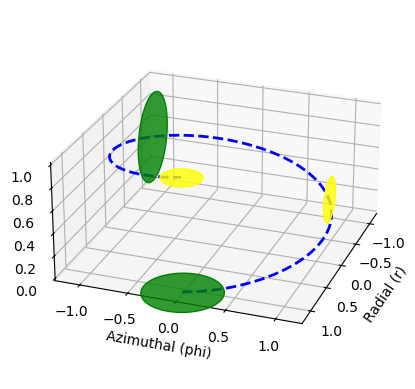

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import astropy.constants as cc
import astropy.units as uu

# Constants
c = cc.c.si.value  # Speed of light in m/s
m_h = (cc.m_e + cc.m_p).si.value
lambda_t = (cc.h/(m_h*c)).si.value
T_t = lambda_t/c  # Compton period of a hydrogen atom in seconds (approximate value)
R = 1e-17  # Example radius in meters

# Calculate angular velocity and tangential velocity
omega = 2 * np.pi / T_t
v_tangential = 2 * np.pi * R / T_t

# Time dilation factor due to rotational motion
time_dilation_factor = np.sqrt(1 - (v_tangential / c) ** 2)

# Function to calculate phase shift adjusted for time dilation
def calculate_phase_shift(tunneling_phase, R, n):
    # Calculate the adjusted phase after n tunnelings
    phase_shift = tunneling_phase * n * time_dilation_factor
    return phase_shift % (2 * np.pi)

# Function to apply rotation to a disk's points with time-dilated phase shift
def rotate_disk(x, y, z, angle):
    # Rotation matrix to tilt the disk at the specified angle along the x-axis
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(angle), -np.sin(angle)],
        [0, np.sin(angle), np.cos(angle)]
    ])
    points = np.array([x, y, z])
    rotated_points = rotation_matrix @ points
    return rotated_points[0], rotated_points[1], rotated_points[2]

# Function to plot a disk as a filled polygon with specific orientation
def plot_disk(ax, r, phi, z, radius, angle, color):
    # Convert the center of the disk from cylindrical to Cartesian coordinates
    x_center = r * np.cos(phi)
    y_center = r * np.sin(phi)

    # Parameterize the disk
    u = np.linspace(0, 2 * np.pi, 100)  # Angle around the disk
    x_disk = radius * np.cos(u)
    y_disk = radius * np.sin(u)
    z_disk = np.zeros_like(u)

    # Rotate the disk by the specified angle
    x_rotated, y_rotated, z_rotated = rotate_disk(x_disk, y_disk, z_disk, angle)

    # Shift the disk to its position in 3D space
    x_rotated += x_center
    y_rotated += y_center
    z_rotated += z

    # Create the polygon and add it to the plot
    verts = [list(zip(x_rotated, y_rotated, z_rotated))]
    poly = Poly3DCollection(verts, color=color, alpha=0.8)
    ax.add_collection3d(poly)

# Define the number of disks and tunneling phases
n_disks = 4
tunneling_phases = [np.pi/2 * i for i in range(n_disks)]  # Phase shifts for each tunneling

# Define the cylindrical coordinates for the disks
z_positions = np.linspace(0, 1, n_disks)  # z positions from 0 to 1
r = 1.1  # Radius of the spiral
phi = np.linspace(0, 2 * np.pi, n_disks, endpoint=True)  # Angles for disks

# Define properties for the disks
disk_sizes = [0.4, 0.2] * (n_disks // 2)  # Alternate between large (proton) and small (electron) disks
colors = ['green', 'yellow'] * (n_disks // 2)  # Alternate colors for dilation/contraction

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the disks with orientation in cylindrical coordinates
for i in range(n_disks):
    # Calculate the time-dilated phase shift for the current disk
    phase_shift = calculate_phase_shift(tunneling_phases[i], R, i + 1)
    
    # Map phase shift to an angle for disk rotation (this is simplified)
    angle = (phase_shift / (2 * np.pi)) * np.pi  # Scaled to fit rotation for visualization

    # Plot the disk with the calculated attitude
    plot_disk(ax, r, phi[i], z_positions[i], disk_sizes[i], angle, color=colors[i])

# Add a spiral line to guide the eye
# Define a fine spiral curve
phi_fine = np.linspace(0, 2 * np.pi, 100)  # More points for a smooth spiral
z_fine = np.linspace(0, 1, 100)  # Match the height range of the disks

# Convert the spiral curve from cylindrical to Cartesian coordinates
x_fine = r * np.cos(phi_fine)
y_fine = r * np.sin(phi_fine)

# Plot the spiral line
ax.plot(x_fine, y_fine, z_fine, color='blue', linewidth=2, linestyle='--')

# Set labels and customize the view to emphasize cylindrical coordinates
ax.set_xlabel('Radial (r)')
ax.set_ylabel('Azimuthal (phi)')
ax.set_zlabel('Height (z)')

# Adjust view and aspect ratio to better visualize the spiral
ax.view_init(elev=25, azim=20)  # Change the elevation and azimuth for better visualization
ax.set_box_aspect([2, 2, 1])  # Adjust the aspect ratio for better spiral view
plt.savefig("./Drawing_For_Publications/SpiralNeutron.png")
plt.show()
